In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Load Dataset 

In [24]:
df = pd.read_csv('Titanic-Dataset.csv')

# Exploratory Data Analysis [EDA]

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns}")
print(f"\nData Types:\n{df.dtypes}")

Dataset Shape: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Identifying the Missing Values

In [27]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (in %)': missing_percentage.round(1)
})
    
print(missing_df[missing_df['Missing Values'] > 0])

          Missing Values  Percentage (in %)
Age                  177               19.9
Cabin                687               77.1
Embarked               2                0.2


Duplicates

Handle Missing values

In [28]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [29]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


In [30]:
print(f"Undesrstanding the numerical stats : \n {df.describe()}")

Undesrstanding the numerical stats : 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Understanding the Dependent variables distribution

In [31]:
if 'Survived' in df.columns:
        print("Dependent Variable Distribution:")
        survival_stats = df['Survived'].value_counts()
        print(f"Survived: {survival_stats[1]} ({survival_stats[1]/len(df)*100:.1f}%)")
        print(f"Died: {survival_stats[0]} ({survival_stats[0]/len(df)*100:.1f}%)")

Dependent Variable Distribution:
Survived: 342 (38.4%)
Died: 549 (61.6%)


Identifying the unique values in categorical variables

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCATEGORICAL FEATURES UNIQUE VALUES:")
for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")


CATEGORICAL FEATURES UNIQUE VALUES:
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


Co-relation

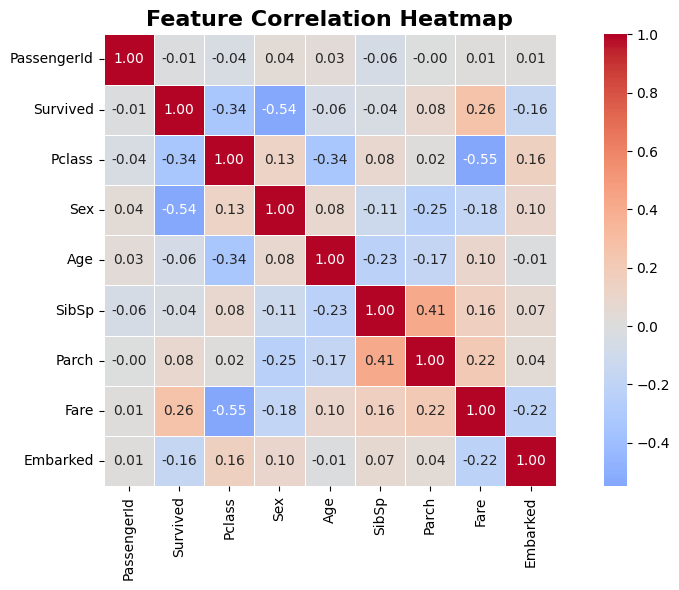


CORRELATION WITH SURVIVAL:
Fare: 0.257
Parch: 0.082
PassengerId: -0.005
SibSp: -0.035
Age: -0.065
Embarked: -0.164
Pclass: -0.338
Sex: -0.543


In [33]:
data_numeric = df.copy()
    
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data_numeric[col] = le.fit_transform(df[col].fillna('Unknown'))
    label_encoders[col] = le
    
numeric_cols = data_numeric.select_dtypes(include=[np.number]).columns
correlation_matrix = data_numeric[numeric_cols].corr()
    
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
    
if 'Survived' in correlation_matrix.columns:
    print("\nCORRELATION WITH SURVIVAL:")
    survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
    for feature, corr_value in survival_corr.items():
            if feature != 'Survived':
                print(f"{feature}: {corr_value:.3f}")

# Feature Engineering

Extracted title from Name

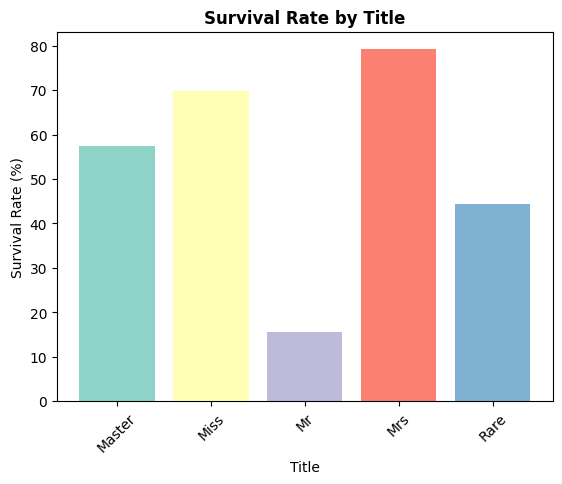

In [34]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Rare')
    
title_survival = df.groupby('Title')['Survived'].mean() * 100
plt.bar(title_survival.index, title_survival.values, color=plt.cm.Set3(range(len(title_survival))))
plt.title('Survival Rate by Title', fontsize=12, fontweight='bold')
plt.xlabel('Title')
plt.ylabel('Survival Rate (%)')
plt.tick_params(axis='x', rotation=45)



Cabin Vs No Cabin

Text(0, 0.5, 'Survival Rate (%)')

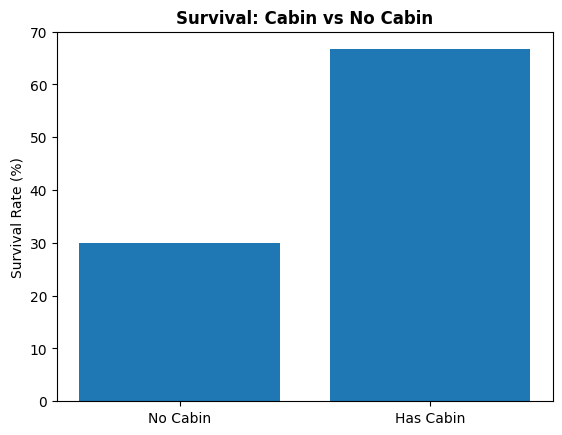

In [35]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
cabin_survival = df.groupby('HasCabin')['Survived'].mean() * 100
plt.bar(['No Cabin', 'Has Cabin'], cabin_survival.values)
plt.title('Survival: Cabin vs No Cabin', fontsize=12, fontweight='bold')
plt.ylabel('Survival Rate (%)')

Text(0, 0.5, 'Survival Rate (%)')

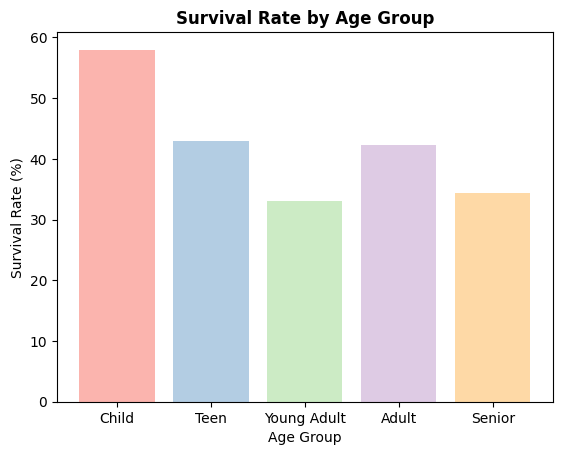

In [36]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], 
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
plt.bar(agegroup_survival.index, agegroup_survival.values, color=plt.cm.Pastel1(range(len(agegroup_survival))))
plt.title('Survival Rate by Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')

In [37]:
X = df.drop('Survived', axis=1)
y = df['Survived']
    
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns
    
print(f"Categorical features: {list(categorical_cols)}")
print(f"Numerical features: {list(numerical_cols)}")
    

Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'AgeGroup']
Numerical features: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin']


# One-hot encode categorical variables

In [38]:

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
print(f"\nAfter encoding: {X_encoded.shape[1]} features")
print(f"Feature names: {X_encoded.columns.tolist()}")


After encoding: 1734 features
Feature names: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Name_Abbott, Mr. Rossmore Edward', 'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel', 'Name_Abelson, Mrs. Samuel (Hannah Wizosky)', 'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John', 'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem', 'Name_Alexander, Mr. William', 'Name_Alhomaki, Mr. Ilmari Rudolf', 'Name_Ali, Mr. Ahmed', 'Name_Ali, Mr. William', 'Name_Allen, Miss. Elisabeth Walton', 'Name_Allen, Mr. William Henry', 'Name_Allison, Master. Hudson Trevor', 'Name_Allison, Miss. Helen Loraine', 'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'Name_Allum, Mr. Owen George', 'Name_Andersen-Jensen, Miss. Carla Christine Nielsine', 'Name_Anderson, Mr. Harry', 'Name_Andersson, Master. Sigvard Harald Elias', 'Name_Andersson, Miss. Ebba Iris Alfrida', 'Name_Andersson, Mi

# Train and Test split 

In [39]:

X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
    
print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Train set: (712, 1734)
Test set: (179, 1734)


# Applying standard Scaler

In [41]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Creating a model dictionary with key as model name and values as (model initialization)

In [42]:
models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'Support Vector Machine': SVC(probability=True, random_state=42)
    }

creating a for loop that will access the dictionary items from key-value pair and provide us various model accuracy and cross val score

In [48]:
results = {}
for name, model in models.items():
        print(f"\n{'─'*40}")
        print(f"Training {name}")
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print(f"ROC-AUC: {roc_auc:.2f}")
        
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"Cross-validation Accuracy: {cv_scores.mean():.2f}")


────────────────────────────────────────
Training Logistic Regression
Accuracy: 0.85
Precision: 0.81
Recall: 0.80
F1-Score: 0.80
ROC-AUC: 0.86
Cross-validation Accuracy: 0.8259

────────────────────────────────────────
Training Random Forest
Accuracy: 0.80
Precision: 0.78
Recall: 0.68
F1-Score: 0.73
ROC-AUC: 0.84
Cross-validation Accuracy: 0.8343

────────────────────────────────────────
Training Gradient Boosting
Accuracy: 0.79
Precision: 0.80
Recall: 0.62
F1-Score: 0.70
ROC-AUC: 0.84
Cross-validation Accuracy: 0.8175

────────────────────────────────────────
Training Support Vector Machine
Accuracy: 0.82
Precision: 0.78
Recall: 0.74
F1-Score: 0.76
ROC-AUC: 0.85
Cross-validation Accuracy: 0.8161
